# Analysis of CSGO proffesional matches from 2015 to 2020

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

## Downloading the Dataset


This dataset contains data about the proffesional CSGO matches from 2015 to 2020, we found that there were 4 csv files, in this case we are going to use the players.csv which contains player's individuals performance per match.

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/mateusdmachado/csgo-professional-matches' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: christiancisneros
Your Kaggle Key: ········


100%|██████████| 36.2M/36.2M [00:00<00:00, 52.9MB/s]


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './csgo-professional-matches'

In [5]:
import os
os.listdir(data_dir)

['players.csv', 'economy.csv', 'results.csv', 'picks.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-csgo-analysis-project" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "christian-cisneros-f/zerotopandas-csgo-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/christian-cisneros-f/zerotopandas-csgo-analysis-project


'https://jovian.ai/christian-cisneros-f/zerotopandas-csgo-analysis-project'

## Data Preparation and Cleaning

**TODO** - We will check if there are any null values that can ruin our analysis and also deal with them if we found such cases



## Loading the dataset players.csv into a dataframe called players_df

In [10]:
import pandas as pd
players_df= pd.read_csv("./csgo-professional-matches/players.csv")

## This dataset contains this number of rows and colums:

In [11]:
print("This dataset contains {} rows and {} columns ".format(players_df.shape[0],players_df.shape[1]))

This dataset contains 383317 rows and 101 columns 


In [12]:
match_df=players_df[['match_id','player_name','team','opponent','player_id','country','event_id','event_name','best_of','kills','assists','deaths']]
match_df
#match_df.loc[match_df['player_name']=="EliGE"]

,match_id,player_name,team,opponent,player_id,country,event_id,event_name,best_of,kills,assists,deaths
0,2339385,Brehze,Evil Geniuses,Liquid,9136,United States,4901,IEM Katowice 2020,3,57,14,61
1,2339385,CeRq,Evil Geniuses,Liquid,11219,Bulgaria,4901,IEM Katowice 2020,3,54,10,54
2,2339385,EliGE,Liquid,Evil Geniuses,8738,United States,4901,IEM Katowice 2020,3,55,10,51
3,2339385,Ethan,Evil Geniuses,Liquid,10671,United States,4901,IEM Katowice 2020,3,43,5,54
4,2339385,NAF,Liquid,Evil Geniuses,8520,Canada,4901,IEM Katowice 2020,3,52,22,46
...,...,...,...,...,...,...,...,...,...,...,...,...
383312,2298497,kIMERA,ExAequo,RIP Fonty,7607,Italy,1957,Milan Games Week 2015 League by FACEIT,2,30,2,17
383313,2298497,morphiw0w,ExAequo,RIP Fonty,9752,Italy,1957,Milan Games Week 2015 League by FACEIT,2,26,6,22
383314,2298497,overfly,RIP Fonty,ExAequo,7698,Italy,1957,Milan Games Week 2015 League by FACEIT,2,28,4,34
383315,2298497,simozor,RIP Fonty,ExAequo,9753,Italy,1957,Milan Games Week 2015 League by FACEIT,2,18,7,36


## We will be analizing this short dataframe for now
First we will check if there are missing values in the dataframe

In [13]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383317 entries, 0 to 383316
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   match_id     383317 non-null  int64 
 1   player_name  383316 non-null  object
 2   team         383317 non-null  object
 3   opponent     383317 non-null  object
 4   player_id    383317 non-null  int64 
 5   country      383317 non-null  object
 6   event_id     383317 non-null  int64 
 7   event_name   383317 non-null  object
 8   best_of      383317 non-null  int64 
 9   kills        383317 non-null  int64 
 10  assists      383317 non-null  int64 
 11  deaths       383317 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 35.1+ MB


We can see that there are 383317 non nulls match_ids but one less player_name

In [14]:
match_df.loc[match_df['player_name'].isnull()]


,match_id,player_name,team,opponent,player_id,country,event_id,event_name,best_of,kills,assists,deaths
359054,2301329,NaN,TSG,LDDM,10831,Brazil,2170,Razer Rising Stars South American League Quali...,1,15,0,19


In [15]:
match_df.loc[match_df['player_id']==10831]

,match_id,player_name,team,opponent,player_id,country,event_id,event_name,best_of,kills,assists,deaths
359054,2301329,NaN,TSG,LDDM,10831,Brazil,2170,Razer Rising Stars South American League Quali...,1,15,0,19


## We can see that there is one player that doesnt have a player_name and it seems like he only has one registered match, since its only one we can either drop it or leave it there, for this example im going to take out the row

In [16]:
match_df=match_df[match_df['player_name'].notna()]
match_df.shape

(383316, 12)

There were 383317 rows × 12 columns but now there is one less row

In [17]:
import jovian

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "christian-cisneros-f/zerotopandas-csgo-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/christian-cisneros-f/zerotopandas-csgo-analysis-project


'https://jovian.ai/christian-cisneros-f/zerotopandas-csgo-analysis-project'

## We will be getting some data from the dataframe like
1.We want to know which country has the most matches played

In [19]:
df1=match_df[['country','match_id']]
df1 = df1[['country','match_id']].drop_duplicates()
df1 = df1.reset_index(drop=True)
df1

,country,match_id
0,United States,2339385
1,Bulgaria,2339385
2,Canada,2339385
3,United Kingdom,2339391
4,Bosnia and Herzegovina,2339391
...,...,...
104858,Sweden,2298484
104859,Spain,2298510
104860,Norway,2298490
104861,Poland,2298490


In [20]:

df1['Counts'] = df1.groupby(['country'])['match_id'].transform('count')
df2 = df1[['country','Counts']].drop_duplicates()
df2=df2.sort_values('Counts',ascending=False)
df2.head(10)



,country,Counts
0,United States,7850
14,Denmark,7113
8,Sweden,6741
2,Canada,6027
17,Russia,5675
7,Brazil,4236
58,Poland,3929
24,Australia,3813
5,France,3732
19,Ukraine,3636


In [21]:
print("The country with most matches played is {} with {} matches".format(df2.at[0,'country'],df2.at[0,'Counts']))

The country with most matches played is United States with 7850 matches


We can also search for any country
Lets search my country Perú!

In [22]:
df2.loc[df2['country']=="Peru"]
country=df2.loc[df2['country']=="Peru"].at[1968,'country']
value=df2.loc[df2['country']=="Peru"].at[1968,'Counts']
print("{} has {} matches played".format(country,value))

Peru has 159 matches played


## Exploratory Analysis and Visualization

**TODO** - We will now grab some interesting data with their respective graphs



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it
## WE WILL SEE THE 10 COUNTRIES WITH MOST MATCHES PLAYED

In [24]:
matches_per_country_df=df2.reset_index(drop=True)
first_10_df=matches_per_country_df.head(10)
first_10_df

,country,Counts
0,United States,7850
1,Denmark,7113
2,Sweden,6741
3,Canada,6027
4,Russia,5675
5,Brazil,4236
6,Poland,3929
7,Australia,3813
8,France,3732
9,Ukraine,3636


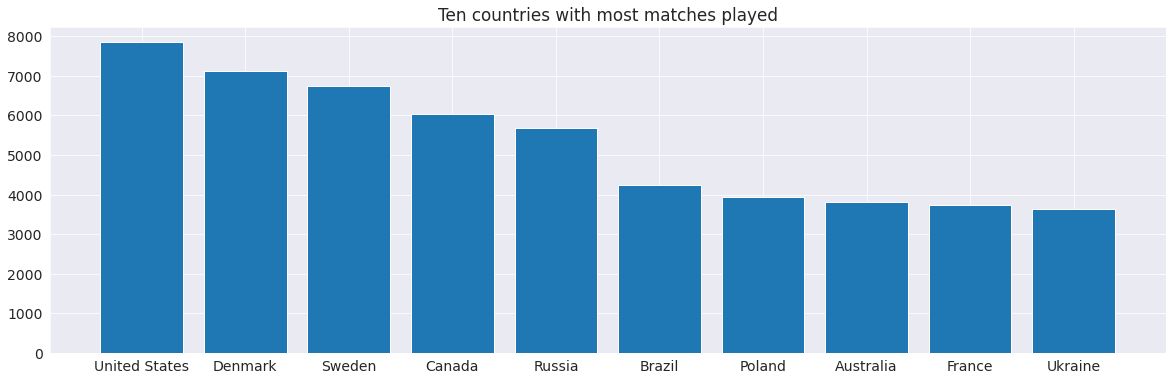

In [25]:
plt.figure(figsize=(20, 6))
plt.bar(first_10_df.country, first_10_df.Counts)
plt.title('Ten countries with most matches played')
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

## We will see the relationship between kills and deaths

<AxesSubplot:xlabel='kills', ylabel='deaths'>

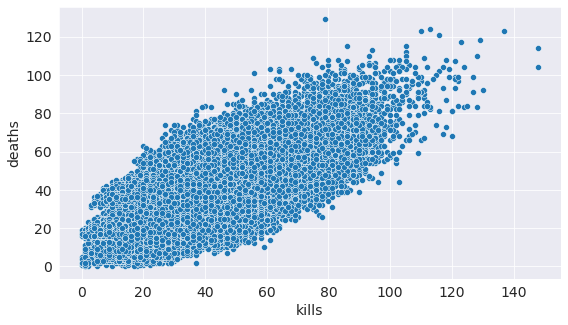

In [26]:
sns.scatterplot(x=match_df.kills, y=match_df.deaths)

We can see that kills and deaths are related

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

For this one we will be extracting a different dataframe from the big dataset

In [27]:
date_df=players_df[['date','match_id']]
date_df=date_df.drop_duplicates()
date_df=date_df.reset_index(drop=True)
date_df


,date,match_id
0,2020-02-26,2339385
1,2020-02-26,2339391
2,2020-02-26,2339384
3,2020-02-26,2339390
4,2020-02-26,2339389
...,...,...
38370,2015-10-07,2298487
38371,2015-10-07,2298484
38372,2015-10-07,2298510
38373,2015-10-07,2298490


## We will be adding the name of a day as a column

In [28]:
#First we need to convent the dtype object to datetime64
date_df['date']=pd.to_datetime(date_df.date)
date_df['date']

0       2020-02-26
1       2020-02-26
2       2020-02-26
3       2020-02-26
4       2020-02-26
           ...    
38370   2015-10-07
38371   2015-10-07
38372   2015-10-07
38373   2015-10-07
38374   2015-10-07
Name: date, Length: 38375, dtype: datetime64[ns]

In [29]:
date_df['weekday']=date_df['date'].dt.day_name()
## we mistankenly added a column day as weekday , we can drop that column with
#date_df.drop(columns=['day'],inplace=True)
date_df

,date,match_id,weekday
0,2020-02-26,2339385,Wednesday
1,2020-02-26,2339391,Wednesday
2,2020-02-26,2339384,Wednesday
3,2020-02-26,2339390,Wednesday
4,2020-02-26,2339389,Wednesday
...,...,...,...
38370,2015-10-07,2298487,Wednesday
38371,2015-10-07,2298484,Wednesday
38372,2015-10-07,2298510,Wednesday
38373,2015-10-07,2298490,Wednesday


**TODO** - We will see how the matches are distributed by weekday

In [30]:
date_df['count'] = date_df.groupby(['weekday'])['match_id'].transform('count')
new_date_df = date_df[['weekday','count']].drop_duplicates()
new_date_df=new_date_df.sort_values('weekday',ascending=True)
new_date_df

,weekday,count
92,Friday,5634
54,Monday,3431
81,Saturday,6119
68,Sunday,5678
6,Thursday,6692
36,Tuesday,4797
0,Wednesday,6024


Text(0, 0.5, 'Matches')

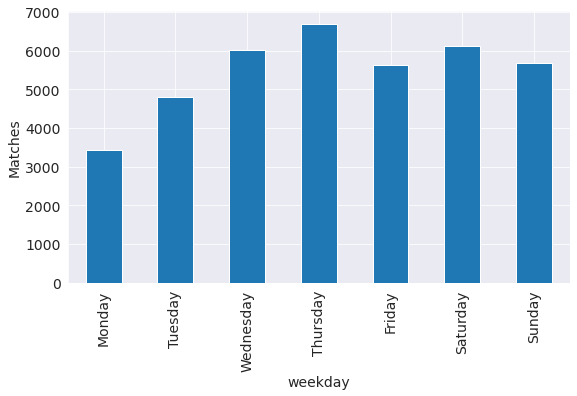

In [31]:
field = "weekday"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = new_date_df.set_index(field).loc[day_order].plot(kind="bar", legend=False)
ax.set_ylabel("Matches")


We see that thursday is the weekday where most matches were played

**TODO** - We will see the map distribution per match, we will only take in consideration the first map from each match

In [32]:
map_df=players_df[['match_id','map_1']]
map_df=map_df.drop_duplicates()
map_df['count'] = map_df.groupby(['map_1'])['match_id'].transform('count')
new_map_df= map_df[['map_1','count']].drop_duplicates()
new_map_df


,map_1,count
0,Overpass,4471
10,Mirage,8038
20,Dust2,3283
50,Inferno,6185
80,Nuke,2945
110,Vertigo,380
160,Train,5060
4079,Default,287
9959,Cobblestone,3187
16955,Cache,4539


Text(0.5, 1.0, 'Map Distribution')

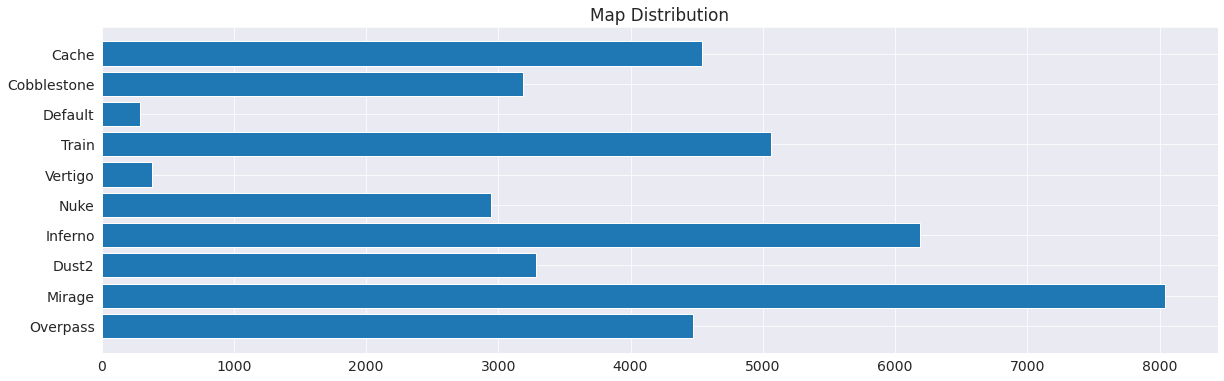

In [33]:
plt.figure(figsize=(20, 6))
plt.barh(new_map_df['map_1'],new_map_df['count'])
plt.title("Map Distribution")

Let us save and upload our work to Jovian before continuing

In [34]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "christian-cisneros-f/zerotopandas-csgo-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/christian-cisneros-f/zerotopandas-csgo-analysis-project


'https://jovian.ai/christian-cisneros-f/zerotopandas-csgo-analysis-project'

## Asking and Answering Questions

TODO - write some explanation here.



#### Q1: TODO - What is the average kill per match

In [36]:
average_kills= match_df.kills.mean()
print("The average kills per match is {}".format(average_kills))

The average kills per match is 29.95578321802377


### The average kills per match is 29.95578321802377


#### Q2: TODO - Which games modes are most played and how many are they

In [37]:
game_mode_df=match_df[['match_id','best_of']]
game_mode_df.drop_duplicates()
game_mode_df['count']=game_mode_df.groupby('best_of').transform('count')
newdf = game_mode_df[['best_of','count']].drop_duplicates()
newdf

/tmp/ipykernel_59/1471117545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_mode_df['count']=game_mode_df.groupby('best_of').transform('count')


,best_of,count
0,3,178728
60,1,185253
1370,2,15650
4648,5,3685


### There are 4 gamemodes and the most played game mode is best of 1 with 185253 games


#### Q3: TODO - Which event had the most matches

In [38]:
events_df=match_df[['match_id','event_name']]
events_df.drop_duplicates


<bound method DataFrame.drop_duplicates of         match_id                              event_name
0        2339385                       IEM Katowice 2020
1        2339385                       IEM Katowice 2020
2        2339385                       IEM Katowice 2020
3        2339385                       IEM Katowice 2020
4        2339385                       IEM Katowice 2020
...          ...                                     ...
383312   2298497  Milan Games Week 2015 League by FACEIT
383313   2298497  Milan Games Week 2015 League by FACEIT
383314   2298497  Milan Games Week 2015 League by FACEIT
383315   2298497  Milan Games Week 2015 League by FACEIT
383316   2298497  Milan Games Week 2015 League by FACEIT

[383316 rows x 2 columns]>

In [39]:
big_event=events_df.groupby('event_name').count().sort_values('match_id',ascending=False)
big_event

,match_id
event_name,
ESL Pro League Season 3,2580
ESEA MDL Season 27 Europe,2200
ESEA MDL Season 28 Europe,2150
ESEA MDL Season 26 Europe,2130
Bets.net Challenger Series,2009
...,...
EsportFest 2016,10
Stream.me CIS Challenger League #3,10
2016 D-Fire Lan Final,10


### We can see that the event that had the most games is ESL Pro League Season 3


#### Q4: TODO - How many times have Liquid and Astralis played each other

In [40]:
teams_df=players_df[['match_id','team','opponent']]
teams_df=teams_df.drop_duplicates(subset=['match_id'])
#team_count_df=teams_df.groupby(['team','opponent']).count()
team= (teams_df.team=="Liquid") | (teams_df.team=="Astralis")
opponent=(teams_df.opponent=="Liquid") | (teams_df.opponent=="Astralis")
new_team= team & opponent
short_df=teams_df[new_team]
short_df
#team_count

,match_id,team,opponent
11407,2337844,Liquid,Astralis
12217,2337843,Liquid,Astralis
14495,2338065,Liquid,Astralis
15144,2337795,Liquid,Astralis
21971,2337263,Liquid,Astralis
30777,2336445,Liquid,Astralis
37858,2335650,Liquid,Astralis
49327,2334355,Liquid,Astralis
69016,2332203,Liquid,Astralis
73553,2331599,Liquid,Astralis


### Liquid and Astralis have played 35 times


#### Q5: TODO - Which player has the most games

In [41]:
ind_player_df=players_df[['match_id','player_id','player_name']]
most_df = ind_player_df.groupby('player_name',sort=False).count()
most_df.sort_values('match_id',ascending=False)
#ind_player_df=ind_player_df.groupby('player_name')['match_id'].count()

#ind_player_df['count']=ind_player_df.groupby('player_id').transform('count')

,match_id,player_id
player_name,,
ALEX,887,887
steel,809,809
Furlan,752,752
rain,733,733
HUNDEN,726,726
...,...,...
Trysoft,1,1
0wl,1,1
supahershey,1,1


### The player with most games is ALEX


Let us save and upload our work to Jovian before continuing.

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "christian-cisneros-f/zerotopandas-csgo-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/christian-cisneros-f/zerotopandas-csgo-analysis-project


'https://jovian.ai/christian-cisneros-f/zerotopandas-csgo-analysis-project'

## Inferences and Conclusion

**TODO** -
It was a difficult dataset for me because i didnt really use all the rows as they were really dull. 
Hopefully i can master pandas and visualization libraries in the future

I found interesting that the country that had the most matches played was USA, i say this because USA hasn't really been a big csgo competitor over the years but this might be because americans participate more in the smaller leagues than other countries
In conclusion this was a fun dataset because it is a game that i know about and knowing what the columns meaning were was really helpful when doing an analysis.

In [44]:
import jovian

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "christian-cisneros-f/zerotopandas-csgo-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/christian-cisneros-f/zerotopandas-csgo-analysis-project


'https://jovian.ai/christian-cisneros-f/zerotopandas-csgo-analysis-project'

## References and Future Work

**TODO** - 
Im gonna do more analysis of covid dataset for my country Perú which can be seen in the link below:

https://jovian.ai/christian-cisneros-f/covid-19-peru

Im just beggining but hopefully i make a great job in the future as i want to start my path into becoming a data analyst after i finish university

#### References:
- https://pandas.pydata.org/docs/user_guide/index.html#user-guide
- https://matplotlib.org/stable/tutorials/introductory/usage.html
- stackoverflow.com
- And of course this helpful Course



In [46]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>